In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

# Dataset: Layoffs post pandemic
Reading and analyzing the data :

In [ ]:
layoff_df = pd.read_csv('layoffs_data.csv')
layoff_df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Percentage,Date,Source,Funds_Raised,Stage,Date_Added,Country,List_of_Employees_Laid_Off
0,Salesforce,SF Bay Area,Sales,700.0,0.01,2024-01-26,https://www.wsj.com/economy/jobs/salesforce-la...,65.0,Post-IPO,2024-01-26 14:26:09,United States,Unknown
1,Flexport,SF Bay Area,Logistics,NaN,0.20,2024-01-26,https://www.theinformation.com/articles/flexpo...,2400.0,Series E,2024-01-26 19:48:39,United States,Unknown
2,Microsoft,Seattle,Other,1900.0,NaN,2024-01-25,https://www.theverge.com/2024/1/25/24049050/mi...,1.0,Post-IPO,2024-01-25 14:42:40,United States,Unknown
3,Swiggy,Bengaluru,Food,400.0,0.07,2024-01-25,https://techcrunch.com/2024/01/25/swiggy-to-cu...,3600.0,Unknown,2024-01-25 14:45:14,India,Unknown
4,Veho,Boulder,Logistics,65.0,0.19,2024-01-25,https://techcrunch.com/2024/01/25/delivery-sta...,299.0,Series B,2024-01-26 19:50:26,United States,Unknown


In [ ]:
layoff_df.dtypes

Company                        object
Location_HQ                    object
Industry                       object
Laid_Off_Count                float64
Percentage                    float64
Date                           object
Source                         object
Funds_Raised                  float64
Stage                          object
Date_Added                     object
Country                        object
List_of_Employees_Laid_Off     object
dtype: object

In [ ]:
layoff_df.shape

(3374, 12)

# Pre-processing: Cleansing and data transformation

**Removing the irrelevant columns**

In [ ]:
cleaned_layoff_df = layoff_df.copy()
cleaned_layoff_df = cleaned_layoff_df.drop(columns=["List_of_Employees_Laid_Off", "Source", "Date_Added","Percentage"])

**Drop duplicates**

In [ ]:
cleaned_layoff_df = cleaned_layoff_df.drop_duplicates()
len(cleaned_layoff_df)

3372

In [ ]:
cleaned_layoff_df.head(2)

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Funds_Raised,Stage,Country
0,Salesforce,SF Bay Area,Sales,700.0,2024-01-26,65.0,Post-IPO,United States
1,Flexport,SF Bay Area,Logistics,NaN,2024-01-26,2400.0,Series E,United States


**Handling Missing values**

In [ ]:
#Finiding NULL entries across each columns
for column in cleaned_layoff_df.columns:
    null_count = cleaned_layoff_df[column].isna().sum()
    print(f"Null entries in {column}: {null_count}")

Null entries in Company: 0
Null entries in Location_HQ: 0
Null entries in Industry: 0
Null entries in Laid_Off_Count: 1155
Null entries in Date: 0
Null entries in Funds_Raised: 360
Null entries in Stage: 0
Null entries in Country: 0


In [ ]:
cleaned_layoff_df['Funds_Raised'] = cleaned_layoff_df['Funds_Raised'].fillna(0)

cleaned_layoff_df = cleaned_layoff_df.dropna()


In [ ]:
#Data removed :
data_removed = (len(layoff_df) - len(cleaned_layoff_df))/len(layoff_df) *100
data_removed

34.291641967990515

**Our data reduced by 34% post cleaning**

In [ ]:
#Extracting year, month, qtr  from the date laid off
cleaned_layoff_df['Date'] = pd.to_datetime(cleaned_layoff_df['Date'])

cleaned_layoff_df['Year'] = cleaned_layoff_df['Date'].dt.year
cleaned_layoff_df['Month'] = cleaned_layoff_df['Date'].dt.month_name()
cleaned_layoff_df['Quarter'] = cleaned_layoff_df['Date'].dt.to_period('Q')

In [ ]:
cleaned_layoff_df

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Funds_Raised,Stage,Country,Year,Month,Quarter
0,Salesforce,SF Bay Area,Sales,700.0,2024-01-26,65.0,Post-IPO,United States,2024,January,2024Q1
2,Microsoft,Seattle,Other,1900.0,2024-01-25,1.0,Post-IPO,United States,2024,January,2024Q1
3,Swiggy,Bengaluru,Food,400.0,2024-01-25,3600.0,Unknown,India,2024,January,2024Q1
4,Veho,Boulder,Logistics,65.0,2024-01-25,299.0,Series B,United States,2024,January,2024Q1
8,Personio,Munich,HR,100.0,2024-01-24,724.0,Series E,Germany,2024,January,2024Q1
...,...,...,...,...,...,...,...,...,...,...,...
3368,Help.com,Austin,Support,16.0,2020-03-16,6.0,Seed,United States,2020,March,2020Q1
3370,HopSkipDrive,Los Angeles,Transportation,8.0,2020-03-13,45.0,Unknown,United States,2020,March,2020Q1
3371,Panda Squad,SF Bay Area,Consumer,6.0,2020-03-13,1.0,Seed,United States,2020,March,2020Q1
3372,Tamara Mellon,Los Angeles,Retail,20.0,2020-03-12,90.0,Series C,United States,2020,March,2020Q1


In [ ]:
cleaned_layoff_df.dtypes

Company                   object
Location_HQ               object
Industry                  object
Laid_Off_Count           float64
Date              datetime64[ns]
Funds_Raised             float64
Stage                     object
Country                   object
Year                       int64
Month                     object
Quarter            period[Q-DEC]
dtype: object

# EDA: Pattern discovery and Visualizations

**Correlation**

<Axes: >

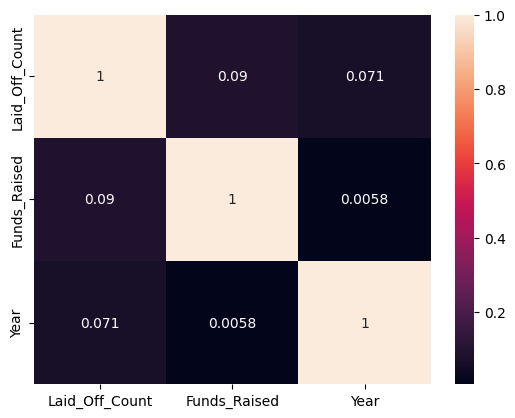

In [ ]:
sns.heatmap(cleaned_layoff_df.corr(numeric_only=True), annot = True)

The features have low correlation

# Analysis by Time

**Year**

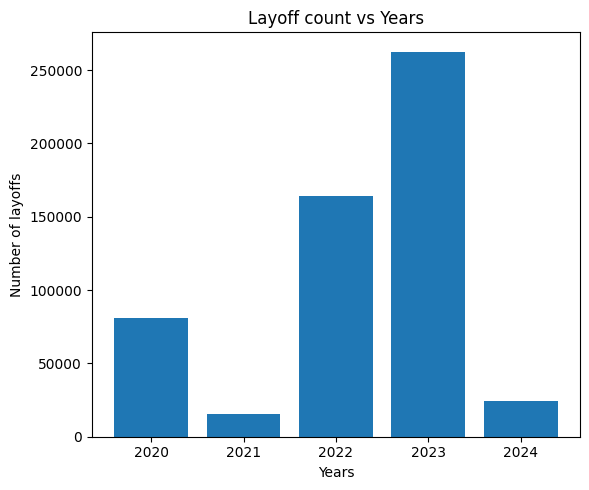

In [ ]:
# Visualize the number Layoffs in these Years
laidOff_countYear = cleaned_layoff_df.groupby('Year')['Laid_Off_Count'].sum().reset_index()

laidOff_countYear.head()
plt.figure(figsize=(6, 5))
plt.bar(laidOff_countYear['Year'], laidOff_countYear['Laid_Off_Count'])
plt.xlabel('Years'), plt.ylabel('Number of layoffs')
plt.title("Layoff count vs Years")
plt.tight_layout()

The above graph shows maximum lay offs happened in the year 2023.

**Quarter**

In [ ]:
# Layoffs seasonality as per qtr

cleaned_layoff_df['Quarter'] = cleaned_layoff_df['Quarter'].astype(str)

qtr_layoffs_count = cleaned_layoff_df.groupby('Quarter')['Laid_Off_Count'].sum().sort_values(ascending=False)
# qtr_layoffs_count['Quarter'] = qtr_layoffs_count['Quarter'].astype(str)


# Create a bar chart representing layoffs distribution by stage
fig = px.bar(qtr_layoffs_count.reset_index(),
              x='Quarter',
              y='Laid_Off_Count',
              title='Layoffs Distribution by Quarter',
              labels={'Quarter': 'Quarter', 'Laid_Off_Count': 'Number of Layoffs'},
              color='Quarter',
              color_continuous_scale=px.colors.sequential.Turbo,

              )

fig.show()

**Month**

In [ ]:
# Layoffs seasonality as per months

# Group by month and sum the layoffs value
month_layoffs_count = cleaned_layoff_df.groupby('Month')['Laid_Off_Count'].sum().sort_values(ascending=False)

# Create a bar chart representing layoffs distribution by stage
fig = px.bar(month_layoffs_count.reset_index(),
              x='Month',
              y='Laid_Off_Count',
              title='Layoffs Distribution by Month',
              labels={'Month': 'Months', 'Laid_Off_Count': 'Number of Layoffs'},
              color='Month',
              color_continuous_scale=px.colors.sequential.Turbo,

              )

fig.show()

# Analysis by Industry


In [ ]:
cleaned_layoff_df['Industry'].unique()

array(['Sales', 'Other', 'Food', 'Logistics', 'HR', 'Media', 'Retail',
       'Transportation', 'Finance', 'Fitness', 'Consumer', 'Energy',
       'Healthcare', 'Data', 'Marketing', 'Hardware', 'Security',
       'Travel', 'Manufacturing', 'Education', 'Product', 'AI',
       'Infrastructure', 'Real Estate', 'Aerospace', 'Recruiting',
       'Crypto', 'Legal', 'Unknown', 'Support', 'Construction'],
      dtype=object)

In [ ]:
#Merging the Unknown and Other
cleaned_layoff_df['Industry'] = cleaned_layoff_df['Industry'].replace('', 'Unknown')
cleaned_layoff_df['Industry'] = cleaned_layoff_df['Industry'].replace('Unknown', 'Other')

In [ ]:
#Laidoff Counts:
laid_off_byIndustry = cleaned_layoff_df.groupby('Industry')['Laid_Off_Count'].sum().sort_values(ascending=True).reset_index()

fig_industries_box = px.bar(laid_off_byIndustry,
    x = 'Laid_Off_Count',
    y = 'Industry',
    title = 'Distribution of Layoffs Across Industries',
    labels={'Industry': 'Industry', 'Laid_Off_Count': 'Number of Layoffs'},
    color='Laid_Off_Count',
    color_continuous_scale=px.colors.sequential.Emrld,
    height = 700
    )
fig_industries_box

Percentage distribution across industries

In [ ]:
fig_industries_pie = px.pie(laid_off_byIndustry.reset_index(),
              names = 'Industry',
              values = 'Laid_Off_Count',
              title = 'Percentage of Layoffs',
              color_discrete_sequence=px.colors.sequential.Emrld)
fig_industries_pie.show()

**Maximum number of layoffs happened in Retail industry followed by Consumer industry.**

# Analysis by company stages


In [ ]:
# Stage VS Company Layoffs
stage_layoffs_count = cleaned_layoff_df.copy()
stage_layoffs_count.Stage.unique()

array(['Post-IPO', 'Unknown', 'Series B', 'Series E', 'Series D',
       'Series F', 'Acquired', 'Seed', 'Series C', 'Series H',
       'Subsidiary', 'Series A', 'Series G', 'Private Equity', 'Series J',
       'Series I'], dtype=object)

In [ ]:
stage_layoffs_count = stage_layoffs_count[stage_layoffs_count.Stage != 'Unknown']

# Group by stage and sum the layoffs value
stage_layoffs_count = stage_layoffs_count.groupby('Stage')['Laid_Off_Count'].sum().sort_values(ascending=False)

# Create a bar chart representing layoffs distribution by stage
fig = px.bar(stage_layoffs_count.reset_index(),
              x='Stage',
              y='Laid_Off_Count',
              title='Layoffs Distribution by Stage',
              labels={'Stage': 'Company Stage', 'Laid_Off_Count': 'Number of Layoffs'},
              color='Laid_Off_Count',
              color_continuous_scale=px.colors.sequential.RdBu)

fig.show()

In [ ]:

# Produce a pie chart to demonstrate the distribution of company stages among the layoffs

fig2 = px.pie(stage_layoffs_count.reset_index(),
              names = 'Stage',
              values = 'Laid_Off_Count',
              title = 'Distribution of Company Stages Among the Layoffs',
              color_discrete_sequence=px.colors.sequential.RdBu)
fig2.show()

# Analysis by Funds


In [ ]:
# Funds Raised VS Company Layoffs

funds_count = cleaned_layoff_df[cleaned_layoff_df.Stage != 'Post-IPO' ]
funds_count = funds_count[funds_count.Stage != 'Acquired' ]

# Distribution of the Funds Raised VS. Number of Layoffs
fig3 = px.scatter(funds_count,
                  x='Funds_Raised',
                  y='Laid_Off_Count',
                  title='Funds Raised vs. Number of Layoffs',
                  labels={'Funds_Raised': '$ Funds Raised (in Millions)', 'Laid_Off_Count': 'Number of Layoffs'},
                  color='Laid_Off_Count',
                  color_continuous_scale=px.colors.sequential.RdBu,
                  hover_name='Company')

fig3.show()

For startups, funding is a crucial factor for layoffs. This does not impact companies in POST-IPO or Acquired stage.

# Analysis by Location

**Country**

In [ ]:
#layoffs according to the countries

laidOff_countByCountry = cleaned_layoff_df.groupby('Country')['Laid_Off_Count'].sum().reset_index()

fig2 = px.bar(laidOff_countByCountry.reset_index(),
              x = 'Country',
              y = 'Laid_Off_Count',
              title = 'Layoffs in various countries',
              labels={'Country': 'Country', 'Laid_Off_Count': 'Number of Layoffs'},
              color_discrete_sequence=px.colors.sequential.Electric)
fig2.show()

**Top 10 countries with high layoff number:**


In [ ]:
# Top 10 countries for analysis
top_10_sorted_df = laidOff_countByCountry.nlargest(10, 'Laid_Off_Count')

fig2 = px.bar(top_10_sorted_df.reset_index(),
              x = 'Country',
              y = 'Laid_Off_Count',
              title = 'Countries with most layoffs',
              labels={'Country': 'Country', 'Laid_Off_Count': 'Number of Layoffs'},
              color_discrete_sequence=px.colors.sequential.Rainbow)
fig2.show()

Based on the visual analysis until now, it appears that the majority of layoffs occurred within the **Retail** sector, particularly among companies in the **POST IPO** stage, and those predominantly located in the **United States**

**HQ Location of companies**

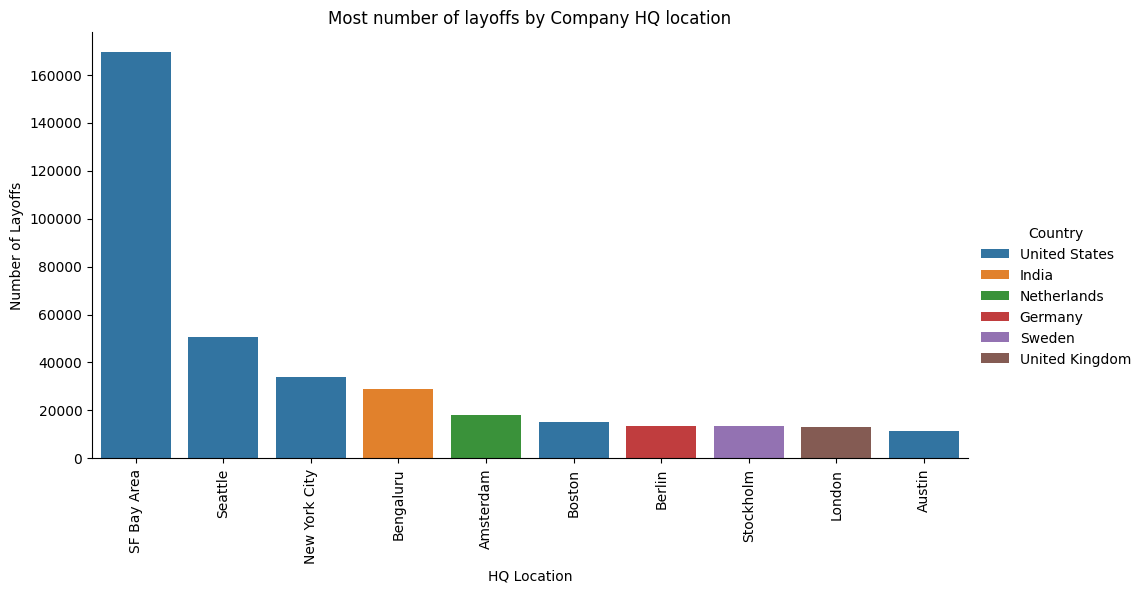

In [ ]:
# Top locations with highest layoffs

laidOff_countByLocation = cleaned_layoff_df.groupby(by= ['Country', 'Location_HQ'])['Laid_Off_Count'].sum().reset_index()
# top_10_sorted_df = laidOff_countByCountry.nlargest(10, 'Laid_Off_Count')

top_location_sorted_df = laidOff_countByLocation.nlargest(10, 'Laid_Off_Count')

sns.catplot(
    data=top_location_sorted_df, x="Location_HQ", y="Laid_Off_Count", hue="Country", kind="bar",  height=5, aspect=2
)

plt.gca().set_xlabel('HQ Location')
plt.gca().set_ylabel('Number of Layoffs')
plt.title('Most number of layoffs by Company HQ location')
plt.xticks(rotation=90)

plt.show()


# Analysis by Company

In [ ]:
#Most impacted companies in US
us_layoffs_count_df = cleaned_layoff_df[cleaned_layoff_df['Country'] =='United States']

us_layoffs_count = us_layoffs_count_df.groupby(by =['Company', 'Industry'])['Laid_Off_Count'].sum().sort_values(ascending=False).head(10)

fig = px.bar(us_layoffs_count.reset_index(),
              x='Company',
              y='Laid_Off_Count',
              title='Most impacted companies in US',
              labels={'Company': 'Company', 'Laid_Off_Count': 'Number of Layoffs'},
              color='Industry',
              color_continuous_scale=px.colors.sequential.Greens_r,

              )

fig.show()

**Summary**:

In 2023, companies, especially those in the post-IPO stage, witnessed a surge in layoffs, with the United States experiencing a notable increase during the first quarter.

Industries like Retail and Consumer were heavily affected, leading giants such as Amazon, Meta, and Google downsized their workforce.







